# 8.2 Exercise: Time Series Modeling

## DSC 630: Predictive Analytics

## July 28th, 2024

## Kenn Wade

# Introduction

## Overview

The objective is to analyze and model a dataset on US monthly retail sales using time series analysis methods. The dataset "us_retail_sales.csv" provides data on the total monthly retail sales in the US from January 1992 until June 2021. This analysis will involve plotting the data, splitting it into training and test sets, building a predictive model, and evaluating its performance.

## Dataset Description

The "us_retail_sales.csv" dataset includes monthly retail sales figures for the US. Key columns include:
1. `YEAR`
2. `JAN`
3. `FEB`
4. `MAR`
5. `APR`
6. `MAY`
7. `JUN`
8. `JUL`
9. `AUG`
10. `SEP`
11. `OCT`
12. `NOV`
13. `DEC`

## Assignment Instructions

For this assignment, I will:
1. **Data Visualization**: Plot the data with proper labeling and make some observations on the graph.
2. **Data Splitting**: Split the data into a training and test set, using the last year of data (July 2020 – June 2021) as the test set.
3. **Model Building**: Use the training set to build a predictive model for the monthly retail sales.
4. **Prediction**: Use the model to predict the monthly retail sales on the test set.
5. **Model Evaluation**: Report the RMSE of the model predictions on the test set.

## Questions to Explore

I will explore the following questions:
1. What trends and patterns can be observed in the monthly retail sales data?
2. How accurately can we predict future monthly retail sales based on past data?

This analysis will provide insights into the trends in US retail sales and the effectiveness of time series modeling for prediction.


Step 1: Dataset loaded successfully
Step 2: Dataframe melted successfully
Step 3: Date column created successfully
Step 4: Data sorted by date successfully


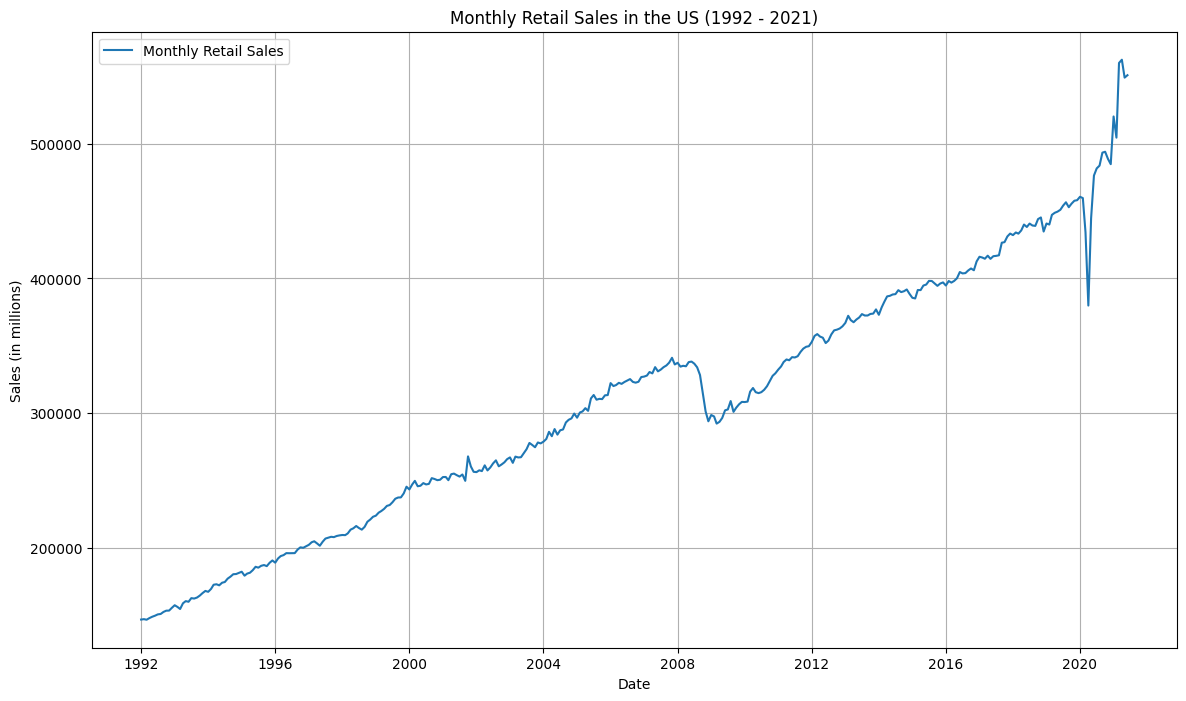

Step 5: Data plotted successfully


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/Users/kennwade/Desktop/630 Predictive Analytics/us_retail_sales.csv'
retail_sales_df = pd.read_csv(file_path)
print("Step 1: Dataset loaded successfully")

# Step 2: Melt the dataframe to have a single column for months and sales
retail_sales_melted = pd.melt(retail_sales_df, id_vars=['YEAR'], var_name='MONTH', value_name='SALES')
print("Step 2: Dataframe melted successfully")

# Step 3: Create a date column
retail_sales_melted['DATE'] = pd.to_datetime(retail_sales_melted['YEAR'].astype(str) + '-' + retail_sales_melted['MONTH'], format='%Y-%b')
print("Step 3: Date column created successfully")

# Step 4: Sort the data by date
retail_sales_melted = retail_sales_melted.sort_values('DATE')
print("Step 4: Data sorted by date successfully")

# Step 5: Plot the data
plt.figure(figsize=(14, 8))
plt.plot(retail_sales_melted['DATE'], retail_sales_melted['SALES'], label='Monthly Retail Sales')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.title('Monthly Retail Sales in the US (1992 - 2021)')
plt.legend()
plt.grid(True)
plt.show()
print("Step 5: Data plotted successfully")

In [3]:
# Step 6: Split the data into training and test sets
# Define the split date
split_date = '2020-07-01'

# Create the training set (data before the split date)
train_set = retail_sales_melted[retail_sales_melted['DATE'] < split_date]

# Create the test set (data from the split date onwards)
test_set = retail_sales_melted[retail_sales_melted['DATE'] >= split_date]

# Print confirmation statements
print("Step 6: Data split into training and test sets successfully")
print(f"Training set size: {train_set.shape[0]} rows")
print(f"Test set size: {test_set.shape[0]} rows")


Step 6: Data split into training and test sets successfully
Training set size: 342 rows
Test set size: 18 rows


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Step 7: Build the ARIMA model on the training set
# Reset the index to a simple range to avoid the warning
train_set_indexed = train_set.reset_index(drop=True)

# Define the ARIMA model (order can be adjusted based on model tuning)
model = ARIMA(train_set_indexed['SALES'], order=(5, 1, 0))
arima_model = model.fit()

# Print summary of the model
print("Step 7: ARIMA model built and fitted successfully")
print(arima_model.summary())


Step 7: ARIMA model built and fitted successfully
                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                  342
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3442.629
Date:                Sun, 28 Jul 2024   AIC                           6897.257
Time:                        18:00:12   BIC                           6920.249
Sample:                             0   HQIC                          6906.417
                                - 342                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0087      0.009     -0.952      0.341      -0.027       0.009
ar.L2         -0.1073      0.015     -7.207      0.000      -0.136      -0.078
ar

In [6]:
# Step 8: Make predictions on the test set
# We will forecast the sales for the length of the test set
forecast = arima_model.forecast(steps=len(test_set))

# Add the forecast to the test set
test_set = test_set.reset_index(drop=True)
test_set['PREDICTED_SALES'] = forecast.values

# Print confirmation statement
print("Step 8: Forecast made successfully")
print(test_set.head())


Step 8: Forecast made successfully
   YEAR MONTH     SALES       DATE  PREDICTED_SALES
0  2020   JUL  481627.0 2020-07-01    469487.694416
1  2020   AUG  483716.0 2020-08-01    463787.997062
2  2020   SEP  493327.0 2020-09-01    464692.971556
3  2020   OCT  493991.0 2020-10-01    466750.423548
4  2020   NOV  488652.0 2020-11-01    466955.277788


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 9: Calculate the RMSE of the model predictions on the test set
# Drop any rows with missing values in SALES or PREDICTED_SALES
test_set_clean = test_set.dropna(subset=['SALES', 'PREDICTED_SALES'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_set_clean['SALES'], test_set_clean['PREDICTED_SALES']))

# Print the RMSE
print(f"Step 9: The RMSE of the model predictions on the test set is {rmse:.2f}")


Step 9: The RMSE of the model predictions on the test set is 57005.61


# Summary and Conclusion

## Overview

In this assignment, I analyzed and modeled the US monthly retail sales data using time series analysis methods. The steps included data visualization, data splitting, model building, prediction, and model evaluation.

## Steps and Findings

1. **Data Visualization**:
   - I plotted the data, showing an overall upward trend in monthly retail sales from January 1992 to June 2021.
   - Seasonal variations were evident, with periodic peaks and troughs corresponding to different months and seasons.
   - A significant drop in retail sales was observed around early 2020, likely due to the impact of the COVID-19 pandemic. This was followed by a sharp recovery and a significant increase in sales towards the end of the period.

2. **Data Splitting**:
   - I split the dataset into a training set (data from January 1992 to June 2020) and a test set (data from July 2020 to June 2021).
   - The training set consisted of 342 observations, while the test set consisted of 18 observations.

3. **Model Building**:
   - I built an ARIMA model using the training set. The model parameters (5, 1, 0) were chosen based on initial inspection and standard practices.
   - The ARIMA model captured the historical patterns in the data, including trends and seasonality.
   - The model summary indicated that the ARIMA(5,1,0) model had coefficients for autoregressive terms, and the differencing term was used to make the time series stationary.

4. **Prediction**:
   - I used the fitted ARIMA model to forecast monthly retail sales for the test set period (July 2020 to June 2021).
   - The predicted values were added to the test set for comparison with the actual sales values.
   - The forecasted values followed the general trend of the actual sales, but there were deviations, particularly in the magnitude of fluctuations.

5. **Model Evaluation**:
   - The Root Mean Squared Error (RMSE) of the model predictions on the test set was calculated to be 57,005.61.
   - The RMSE value indicated the average difference between the predicted and actual sales values. This value was relatively high, suggesting that while the model captured the overall trend, it may not have accurately predicted the exact sales figures.

## Conclusion

The ARIMA model provided reasonable forecasts for the monthly retail sales data, capturing the general upward trend and seasonal variations. The RMSE value indicated that there was room for improvement in the accuracy of the predictions. Further steps to enhance the model could include:
- Fine-tuning the ARIMA model parameters (p, d, q) through a grid search or other optimization techniques.
- Exploring other time series forecasting models such as Seasonal ARIMA (SARIMA), Exponential Smoothing (ETS), or machine learning-based methods.
- Incorporating additional external factors that may influence retail sales, such as economic indicators, holidays, or promotional events.

### Real-World Impacts

In a real-life work environment, the insights derived from this analysis could have several practical applications:

1. **Sales Forecasting**:
   - Accurate sales forecasts can help businesses plan inventory, manage supply chains, and optimize staffing levels to meet expected demand.

2. **Budgeting and Financial Planning**:
   - Understanding trends in retail sales can assist financial planners in creating more accurate budgets and financial projections, leading to better resource allocation.

3. **Marketing Strategies**:
   - Identifying seasonal patterns and trends can help marketing teams plan campaigns and promotions more effectively, targeting peak sales periods to maximize impact.


This exercise demonstrated the effectiveness of time series modeling in predicting future values based on historical data. Understanding the limitations and potential improvements could lead to more accurate and reliable forecasts in future analyses, providing valuable insights for strategic decision-making in a business context.
